In [114]:
import galois
import numpy as np
import matplotlib.pyplot as plt

In [115]:
####### CONSTANTS #######

# Generate a finite field of 2**32 elements (essentially 32 bit ints)
GF = galois.GF(2**32, display='int')

# Inputs to the secret sharing scheme
SECRET_NUMBER = GF(123456789)
NUM_SHARES = 5
THRESHOLD = 3

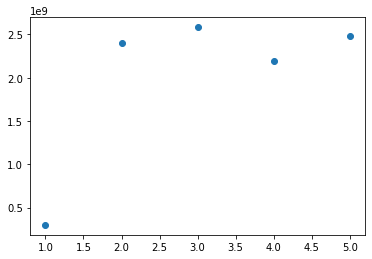

In [116]:
def gen_shares(n: int, k: int, secret: galois.FieldArray):
    """
    Generate n shares of the secret, where k shares are needed to reconstruct the secret.
    """

    # Generate a random polynomial of degree k-1
    coefficients = GF.Random(k)

    # Set the constant term to the secret
    coefficients[-1] = secret

    # Convert coefficients to a polynomial object
    poly = galois.Poly(coefficients)

    # Evaluate the polynomial at n points
    x = GF.Range(start=1, stop=n+1)
    y = poly(x)
    
    # Return the shares
    return list(zip(x, y))

# Plot the shares 
shares = gen_shares(n=NUM_SHARES, k=THRESHOLD, secret=SECRET_NUMBER)
x, y = zip(*shares)
plt.scatter(x, y)
plt.show()

In [125]:
def reconstruct_secret(shares):
    """
    Reconstruct the secret from the shares.
    """
    
    # Combine the x and y coordinates of the shares
    x, y = zip(*shares)
    
    # Compute the Lagrange polynomial
    poly = galois.lagrange_poly(GF(x), GF(y))

    # Evaluate the polynomial at x=0 (where the secret is located)
    return poly(0)

# Pick 3 random shares to reconstruct the secret
s0 = shares[0]
s1 = shares[2]
s2 = shares[4]

# Reconstruct the secret from the shares
rec_secret = reconstruct_secret([s0, s1, s2])
print(f"Reconstructed Secret: {rec_secret}")

# Verify that the reconstructed secret is the same as the original secret
assert rec_secret == SECRET_NUMBER

Reconstructed Secret: 123456789
